In [17]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import dlib
print("End to import Libraries")

my_image_dir = r"C:\Users\Jennie\Desktop\aiffel\Aiffel_MiniProject7\images\faces\KakaoTalk_20221129_114027577_09.jpg"
img_bgr = cv2.imread(my_image_dir)
#img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
img_show = img_bgr.copy()
# https://opencv-python.readthedocs.io/en/latest/doc/01.imageStart/imageStart.html

model_dir = r"C:\Users\Jennie\Desktop\aiffel\Aiffel_MiniProject7\models\shape_predictor_68_face_landmarks.dat"
landmark_predictor = dlib.shape_predictor(model_dir)
print("End to upload weight")

End to import Libraries
End to upload weight


In [18]:
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_bgr, 1)
print(dlib_rects)

rectangles[[(241, 277) (562, 598)]]


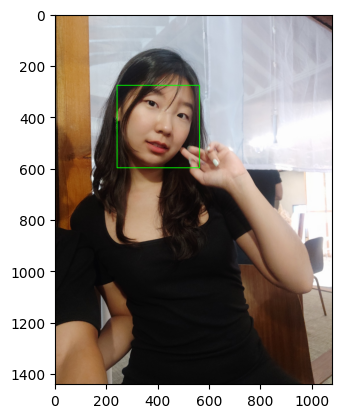

In [19]:
for dlib_rect in dlib_rects:
    l = dlib_rect.left()
    t = dlib_rect.top()
    r = dlib_rect.right()
    b = dlib_rect.bottom()

    cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

In [20]:
list_landmarks = []
for dlib_rect in dlib_rects:
    points = landmark_predictor(img_bgr, dlib_rect)
        # 모든 landmark의 위치정보를 points 변수에 저장
    list_points = list(map(lambda p: (p.x, p.y), points.parts()))
        # 각각의 landmark 위치정보를 (x,y) 형태로 변환하여 list_points 리스트로 저장
    list_landmarks.append(list_points)
        # list_landmarks에 랜드마크 리스트를 저장

print(len(list_landmarks[0]))

68


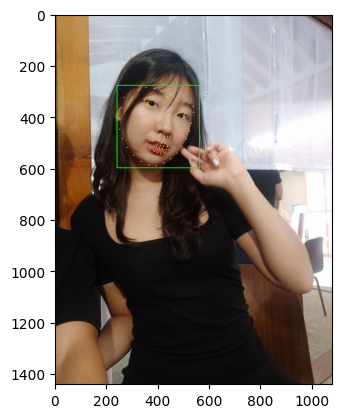

In [21]:
for landmark in list_landmarks:
    for point in landmark:
        cv2.circle(img_show, point, 2, (0, 255, 255), -1)
            # cv2.circle: OpenCV의 원을 그리는 함수
            # img_show 이미지 위 각각의 point에n크기가 2이고 (0, 255, 255)색으로 내부가 채워진(-1) 원을 그림
            # (마지막 인수가 자연수라면 그만큼의 두께의 선으로 원이 그려짐)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

In [22]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    # 얼굴 영역을 저장하고 있는 값과 68개의 랜드마크를 저장하고 있는 값으로 반복문 실행
    print (landmark[32]) # 코의 index는 30 입니다
    x = landmark[32][0] 
    y = landmark[32][1] 
    # y = landmark[30][1] - dlib_rect.height()//2
    w = h = dlib_rect.width() 
    print (f'(x,y) : ({x},{y})')
    print (f'(w,h) : ({w},{h})')

(411, 466)
(x,y) : (411,466)
(w,h) : (322,322)


In [23]:
sticker_dir = r"C:\Users\Jennie\Desktop\aiffel\Aiffel_MiniProject7\images\stickers\cat-whiskers.png"
img_sticker = cv2.imread(sticker_dir)
img_sticker = cv2.resize(img_sticker, (w, h))
# 스티커 이미지 조정 → w,h는 얼굴 영역의 가로를 차지하는 픽셀의 수
# // cv2.resize(image객체 행렬, (가로 길이, 세로 길이))
print (img_sticker.shape) # 사이즈를 조정한 왕관 이미지의 차원 확인

(322, 322, 3)


In [24]:
refined_x = x - w//2+10
refined_y = y - h//2+2 
print (f'(x,y) : ({refined_x},{refined_y})') # 음수 발생 : 이미지 범위를 벗어남

if refined_x < 0: 
    img_sticker = img_sticker[:, -refined_x:]
    refined_x = 0
# 왕관 이미지를 씌우기 위해 왕관 이미지가 시작할 y좌표 값 조정
if refined_y < 0:
    img_sticker = img_sticker[-refined_y:, :]
    refined_y = 0

print (f'(x,y) : ({refined_x},{refined_y})')

(x,y) : (260,307)
(x,y) : (260,307)


In [25]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
print(sticker_area.shape)

(322, 322, 3)


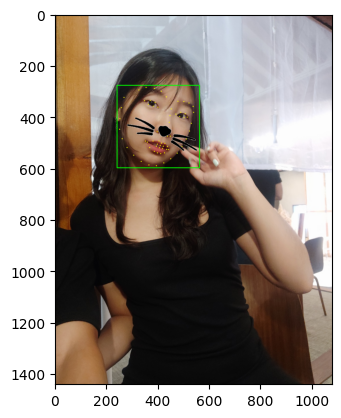

In [26]:
sticker_width, sticker_height = img_sticker.shape[:2]
rotation = cv2.getRotationMatrix2D((sticker_width/2, sticker_height/2), -20, 0.9)
sticker_rotation = cv2.warpAffine(img_sticker, rotation, (sticker_width, sticker_height), borderMode=cv2.BORDER_CONSTANT, borderValue=(255,255,255))
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(sticker_rotation==255,sticker_area,sticker_rotation).astype(np.uint8)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

# 참조 : https://stackoverflow.com/questions/53106780/specify-background-color-when-rotating-an-image-using-opencv-in-python

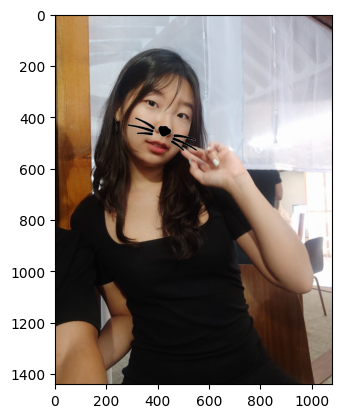

In [27]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
# img_bgr은 7-2에서 rgb로만 적용해놓은 원본 이미지이다. 
img_bgr[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(sticker_rotation==255,sticker_area,sticker_rotation).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)) # rgb만 적용해놓은 원본 이미지에 왕관 이미지를 덮어 씌운 이미지가 나오게 된다.
plt.show()